# Identify the Top 10 Significant Differential miRNAs 

### Author: Shuai Xu
### Time: 04/29/2020
### Project: Using Machine Learning to Identify the Top 10 Significant Differential miRNAs (Final Project of Applied Data Science)
### Instructor:  Asim Banskota

In 2012, President Obama announced the Precision Medicine Initative, indicating that the Era of Precision Medicine is comming. Personalized treatment is an emergencing disease treatment method for patients based on their genes, environment, and lifestyle, allowing doctors and researchers to predict more accurately which treatment and prevention strategies for a particular disease will work in specific groups of people. Personalized treatment has been more popular in cancer field. Oncologists could determine which treatment will work best for you accodring to your genomic information (Deng & Nakamura, 2017). 

Bladder cancer is one of the common cancer in the US. CDC demonstrated that approximately 60,000 men and 20,000 women suffer from this cancer every year (CDC, 2020). Annually, 12,000 men and 5,000 women die from the disease in the US. There are two main subtypes-basal-like and luminal. Treatment selection depends heavily on clinico-pathologic features,but the current clinical staging system is inaccurate. Therefore, a more precise classification method of bladder cancer is necessary.

## Research goal:

Use machine learning model to find out the top 10 significant differential expression genes accounting for molecular heterogeneity of two subtypes of Bladder Cancer 

## Data Resource

I obtained bladder cancer gene expression data from Cartes d’Identite´ des Tumeurs in France and its data code is E-MTAB-1940. 154 participants were included in this study and their blood sample were collected. miRNA count data was generated using miRNA sequencing. These data were also preprocessed after quality control. 

## Method

Machine learning models have been applied to genomic field in the recent years (Pirooznia et al., 2008). In this project, I will follow the below workflow to find out the most significant gene expression

1. Data Importing
2. Exploratory Data Analysis including data visualization and descriptive statistics
3. Data Pre-processing 
4. Model Tuning
5. Model Building
6. Model Evaluation 

### Step 1 Data importing

In [8]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# set the pathway of csv file
data_dir = "C:/Users/shuai/Desktop/"
ads_final=os.path.join(data_dir,"ads.csv")
#loading the csv files
bladder_cancer_gene=pd.read_csv(ads_final)

### Step 2 Exploratory Data Analysis (EDA)

In [5]:
# Show all the columns
pd.set_option('display.max_columns', None)
# Mean and standard deviation of each gene
bladder_cancer_gene.iloc[:,1:].describe()

EEF1A1      DIRAS2       INSM1        DKK3        GKN1       MUC16  \
count  154.000000  154.000000  154.000000  154.000000  154.000000  154.000000   
mean     7.901959    3.253321    3.034226    6.207742    4.166095    4.217621   
std      1.172246    1.088578    1.019278    1.022636    1.167880    1.120932   
min      5.042195    2.392282    2.558658    3.924520    2.872766    3.382264   
25%      6.966382    2.628891    2.790707    5.482049    3.469944    3.692038   
50%      8.000350    2.757122    2.875338    6.166668    3.622390    3.871156   
75%      8.931317    3.258115    2.968478    6.887649    4.272902    4.140423   
max     10.015500    6.992479   12.344229    9.261691    8.450050    9.851425   

            AURKB       NCEH1       KRT19        FUT9      TMEM35       HOXD1  \
count  154.000000  154.000000  154.000000  154.000000  154.000000  154.000000   
mean     5.056904    5.443579   11.916158    4.005900    3.646402    5.653694   
std      1.092040    1.131631    1.066641    1.137869    0.868112    1.097276   
min      3.133690    2.635878    3.554285    2.267474    2.908570    3.710408   
25%      4.181199    4.601410   11.701909    3.023481    3.158833    4.723671   
50%      4.968209    5.449415   12.134500    3.709060    3.306396    5.546249   
75%      5.838927    6.172424   12.472871    4.756404    3.749794    6.458951   
max      7.727735    9.311619   13.101038    7.444809    7.151606    8.474209   

             MAOB     IGHV1-2   LOC654433      GPR124   LINC00470        CD74  \
count  154.000000  154.000000  154.000000  154.000000  154.000000  154.000000   
mean     5.627306    5.186142    5.392560    6.005984    3.429411    8.209377   
std      0.887021    1.117383    1.176219    0.954849    1.101200    1.089300   
min      4.397801    2.923250    3.302666    4.131445    2.672469    5.510782   
25%      4.999430    4.325043    4.422305    5.300266    2.876900    7.434117   
50%      5.324714    5.127876    5.218256    5.793055    2.956644    8.182807   
75%      5.980363    5.764772    6.293217    6.721355    3.226421    9.056878   
max      9.046738    8.519899    8.259967    8.590560    7.873086   10.553424   

             NRN1       DUSP5      VANGL2       CPNE4     RACGAP1       CH25H  \
count  154.000000  154.000000  154.000000  154.000000  154.000000  154.000000   
mean     4.563264    6.943887    5.544246    3.802334    8.758823    4.631783   
std      1.100210    1.066429    1.123411    1.069283    1.057716    0.970669   
min      3.406196    4.597928    3.463673    2.975345    6.001729    3.397937   
25%      3.920622    6.088948    4.422684    3.308188    8.053383    3.887895   
50%      4.186969    7.012947    5.564208    3.436047    8.956889    4.347747   
75%      4.671946    7.617232    6.380878    3.736477    9.587086    5.120676   
max      9.130490   10.217120    9.158059    9.711539   11.165403    7.531297   

             FGF7     C7orf68        GLDC    C11orf75  LOC100128252  \
count  154.000000  154.000000  154.000000  154.000000    154.000000   
mean     3.647369    7.753818    5.580987    6.114389      6.501968   
std      0.886619    1.077257    1.161038    1.127251      1.124485   
min      2.758338    5.512498    3.837218    4.204378      4.581254   
25%      3.120115    6.986821    4.777275    5.160082      5.518982   
50%      3.299037    7.663157    5.115664    5.971639      6.586877   
75%      3.742704    8.407318    6.246888    6.998707      7.362039   
max      7.250532   10.889399   10.459710    9.644636      9.206267   

            IFI16     CYP4Z2P    TMEM176B      MPPED2       ITGA3     NEURL1B  \
count  154.000000  154.000000  154.000000  154.000000  154.000000  154.000000   
mean     8.336808    4.188693    7.194662    4.938969    6.485795    6.914250   
std      1.169937    1.091076    1.035512    1.131826    1.101707    1.042447   
min      4.964591    2.726680    5.034948    3.091952    3.599817    5.018232   
25%      7.658366    3.391267    6.365752    4

From the above table, we can see that the means are little different from the median, indicating that the distribution is skewed but approximately normal.

In [6]:
#calculate the mean in each subtype group (basal-like and luminal)
bladder_cancer_gene.groupby("Type").mean()

,EEF1A1,DIRAS2,INSM1,DKK3,GKN1,MUC16,AURKB,NCEH1,KRT19,FUT9,TMEM35,HOXD1,MAOB,IGHV1-2,LOC654433,GPR124,LINC00470,CD74,NRN1,DUSP5,VANGL2,CPNE4,RACGAP1,CH25H,FGF7,C7orf68,GLDC,C11orf75,LOC100128252,IFI16,CYP4Z2P,TMEM176B,MPPED2,ITGA3,NEURL1B,C4orf19,SYT8,FHOD3,A2ML1,SPAG17,FRY,LINC00341,HIST1H2BD,TLR3,HYMAI,PRUNE2,COL4A1,SLC16A5,ID2,LRIG3,SLC24A3,REN,GRHL1,HERC6,LOC100506553,FCER1G,HSPA2,CPVL,FAM174B,PLCB4,MPEG1,NR1H4,CACNA1D,OXCT1,CYB5A,HOXB2,SDC1,CYP4F22,FRMD3,MOXD1,FXYD4,KIAA1598,IGLV3-19,MNDA,BLNK,CXADR,ZNF552,JUN,CMPK2,GPD1L,EML6,SLC16A4,EGFL6,CX3CR1,GABBR2,RNASE6,FAM26F,MFAP5,PXDN,PAQR8,VIM,CGNL1,KIAA0101,SRPX2,RHPN2,CAB39L,REEP1,NTS,DEPTOR,CRNDE,BUB1,MFAP4,PCDHB6,SERPINB1,IGHV3-23,UCP2,MUC20,NLRC5,PALM3,PP14571,LOC100506948,XK,SLCO1B3,BPIFB1,TAC4,PTX3,GNE,LOC100506687,IMPA2,MLPH,OLFML2B,TRIM29,CAV2,HIST1H4C,GJA1,GDPD3,IRS2,CDH3,HCP5,TPM1,HOTAIRM1,C11orf93,FOXD1,SPON2,MYADM,S100A10,RHOBTB3,GALNT12,C3orf35,ENPP2,THSD7A,GSTA4,IGHV3-9,AKR1B1,TGFBR3,CDC7,CST6,SLC16A1,GOLT1A,NKAIN2,CSGALNACT1,SGPP1,PNMAL1,TNFSF13B,LOC146336,TFAP2A,NDUFA4L2,BNC1,A2M,F2R,LOC100506358,INHBA,IGDCC4,ZNF117,THBD,CFL2,PPP1R14C,MYC,ACTN1,LRMP,SPARC,BIRC3,LNX1,ALDH3B2,ALCAM,CFD,ZDHHC2,TUBB2B,CENPV,SLIT2,CENPW,ACSM3,GBP3,CENPE,ZWINT,CRYAB,SCG5,CNN3,FOXM1,TMEM178,AEBP1,CCL8,GBP5,PGM5,SNX10,ADH1C,COL4A2,PTPN13,ZIC2,DEPDC7,SAMD9,FKBP5,E2F8,GIPC2,SERPINA1,WFDC1,SPAG4,ABCC4,IGFBP6,BCL2A1,RASSF6,PDZRN3,HERC5,LMNB1,OSMR,METTL7A,GPX8,HMOX1,SLC7A5,PTPRC,EGLN3,TNNT3,MGC24103,RNASE4,FABP6,ARMCX2,NELL2,ISG15,BNIP3,TYMS,LRRN1,C15orf52,FRMD4B,ADM,CADM1,EYA2,EZH2,RGS5,MAOA,KCNMB1,STXBP1,ATP10B,MFAP2,SNORD8,ENO2,GSPT2,DES,MX1,PTH2R,TAC1,PYGL,TBX3,TRIM6,LOC100132815,DDIT4,KIF14,ALDH2,MMRN2,GGT6,PCDHB5,CHST2,PLCE1,PDGFC,MSX2,GRAMD1C,DSC2,FAT2,SPARCL1,HLA-DMA,AMIGO2,AIG1,CYBRD1,RASEF,PLK2,ZNF367,HMMR,ELF5,STEAP4,CYP4X1,ADAMTS1,RASSF2,F13A1,ALDH3A1,TRAC,PMEPA1,FGL2,PRR15,HIST1H2BK,CDC6,AKAP12,LHFP,LIN28B,SCEL,LOC100506965,ECT2,FERMT2,CRABP2,SETBP1,CCND1,NCAPG,SERPINA3,FZD10,C1QA,LYPD3,SORBS2,SOCS2,LCP1,SACS,PTHLH,EPDR1,NBEA,BPGM,RCAN2,CXCR4,KRT80,MLLT11,BCHE,LAPTM5,PDZK1IP1,MAP1B,UGT2A3,LOC100287628,PTCHD1,CXCL12,UBE2E2,SAMSN1,CRISPLD2,DPYSL2,EEF1A2,COL12A1,FLNA,C19orf33,CYTIP,PLS1,HLA-DQB1,AURKA,SBSN,TAC3,ALOX5,NID1,OLR1,MCTP1,ASB5,IFI30,FOLH1,PRRX1,KCNG1,FBN1,OLFML3,SELE,STEAP2,LGALS1,TNFSF10,TMEFF2,BST2,CLDN23,SEMA5A,KIF15,COL4A6,RHCG,CFH,DFNA5,CDCA7L,BASP1,KLK3,RAD51AP1,RHOU,OSR1,INPP4B,PDE4B,KLHL29,TRIM22,LCP2,PKIA,POF1B,ALOX5AP,CTSL2,ESM1,TMEM200A,IGLV3-1,MRGPRF,ZNF662,NTN4,AGR3,CDH13,IGFBP2,COCH,MS4A1,C4orf7,NT5E,SLC6A8,TNFAIP3,ME1,IL13RA2,DTL,FOSL1,NR4A2,SLC2A3,TMEM47,VAV3,NETO2,ACSL5,TMEM158,MUC1,DSE,LOC100509100,PDE10A,SELENBP1,HLA-DRB1,SELM,PTGDS,ELOVL7,TRIM31,HSPA1A,PSORS1C2,ERAP2,MECOM,APOL1,MSN,DEGS1,ABCA6,COL21A1,G0S2,TPTE,ARMCX1,EMP1,B3GALNT1,MMP2,IER3,DPYSL3,TDO2,TRIP13,ABAT,PIR,RASGRP1,SERPINF1,TRHDE,CD69,TUBA1A,HEPH,C3,MUC15,EPHX3,PLA2G7,TNFAIP6,CTSK,ID1,CALML3,HOXA1,LPHN2,BTNL9,IGFBP3,S100A12,CLIC4,CDKN3,TMEM45B,UGT2B15,DDX3Y,FNDC1,CYP1B1,SLC44A3,COL6A2,MMP9,CDCA7,CCNB1,HAS2,TGFBI,CENPK,SNAI2,PLAU,LTF,BCAS1,WIF1,GULP1,UPK3B,FOXF1,EVI2B,TRBC2,SLPI,IFI6,OAT,TSPYL5,GSTA1,ROBO1,GATA6,GLT8D2,EPB41L3,C1QC,LOXL1,SERPING1,PRR9,CCNB2,PPFIBP2,DUSP1,PLSCR4,AKR1C1,HSD17B6,CDC20,OSR2,CXCL5,ITGB6,GSTM3,KIF23,CCL5,D4S234E,SERPINB13,CCR7,PLA2G4A,LMO3,CDK1,ST6GALNAC1,RARRES3,QPCT,HOXA13,KCNJ15,MAD2L1,FLRT3,ITGA2,TMPRSS2,CKS2,MICB,SCNN1B,PRTFDC1,PALLD,LIMCH1,MUC4,GXYLT2,CRTAC1,CECR1,BUB1B,EMP3,RGS17,CNGA1,KIF20A,CD14,KIF4A,CRCT1,COL1A1,ZNF750,GSTT1,PLA2G16,TMSB15A,KIT,PHGR1,HIST1H2BG,EGR3,EGR1,ID4,ACSBG1,CALD1,PTGS1,S100A14,COL10A1,STEAP1,SERPINE1,IFIT3,LOC100505946,SCGB1A1,WFDC2,AZGP1,MTHFD2,IFITM1,GINS1,GBP1,MXRA5,C3orf14,CRISPLD1,RAB38,SORL1,CPE,HIST2H2BE,ANKRD30BL,C1R,FCGR3B,TIMP2,FBP1,CFI,TMEM97,TNNI2,BAG2,ANXA9,CCL19,GPR126,GGH,MIR100HG,BCAT1,IGHV1-69,TRNP1,ENPP5,SDR16C5,SRGN,FAP,CCL11,SGK1,SFRP4,PLOD2,CAV1,NUSAP1,FAR2,SULF2,CA2,WNT5A,MMP13,LAMB3,NEXN,GPRC5A,COL11A1,MMD,HOPX,GSTM4,CXCL14,C2orf82,FGFBP1,CCNE2,MELK,C1QB,ALDH1A3,LOC284837,RSAD2,ARHGAP29,LOC100505776,PL

From the tables, we can see that there are some huge differences in gene expression among two subtypes (i.e. gene KRT6A, SPINK1, S100A8 and so on). 

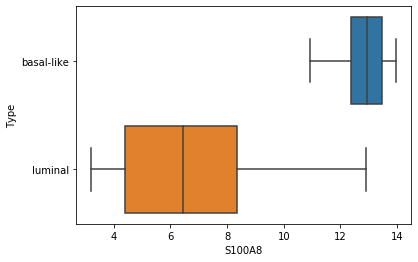

In [102]:
# compare miRNAs S100A8 between bladder cancer subtypes
sns.boxplot(x="S100A8",y="Type",data=bladder_cancer_gene)

Due to a great number of genes, we could not draw all the boxplots. Here, I only draw ONE of them FOR INSTANCE.

### Step 3: Data Pre-processing

### Categorical Recoding 

Many learning algorithms require that class label or target variable are also encoded as integer values. In my dataset, the basal-like subtype was coded as 0 and luminal bladder cancer was coded as 1.

In [24]:
from sklearn.preprocessing import LabelBinarizer  

binary = LabelBinarizer() 
#use binary coding and Creating a new column
bladder_cancer_gene["Type_code"] = binary.fit_transform(bladder_cancer_gene["Type"].values.reshape(-1,1))

### Step 4: Model Tuning and building

## Random Forest Classification

Random Forest model is a type of classification algorithm. It can be used for classification and identifying the most significant feartures. Mean Decrease in Gini is an important feature measuring the contributions of each independent variable to the whole model. Thus, we use MDG as the indicator of the importance of each gene in bladder cancer subtypes classification.

In [25]:
from sklearn.model_selection import train_test_split 
# the independent variables matrix including only the miRNAs
X=bladder_cancer_gene.iloc[:,1:-1]
# the matrix only includes the binary subtypes
Y=bladder_cancer_gene.iloc[:,-1]
# using the 25% dataset as testing dataset and 75% as training dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.25, random_state = 1)

### Hyperparameter Tuning

Hyperparameter tuning was used to identify the models with better parameters. In our model, the parameters including max_depth, n_estimating, max_features, and min_samples_leaf were tuned using random grid search.

In [26]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30],
    'max_features': [2,3,5],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100, 200]
}

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train);
best_grid = grid_search.best_estimator_
best_grid

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   18.2s finished
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
# according to the best grid results, we defined the model and its parameters using pipeline 
from sklearn.pipeline import Pipeline
clf_model = Pipeline(steps=([("clf",RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False))]))
# trained model using training dataset
clf_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('clf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=10,
                                        max_features=5, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=3, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

### Step 5: Model Evaluation

## Model Evaluation

Accuracy and Confusion Matrix are two main indicators of model evaluation. 

In [34]:
from sklearn.metrics import confusion_matrix
# computing the predict value using the above random forest model
y_pred = clf_model.predict(X_test);
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 3  1]
 [ 0 35]]


In [35]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test, y_pred)
print("The accuracy rate of this Random Forest model is {}%".format(np.round(accuracy*100,2)))

The accuracy rate of this Random Forest model is 97.44%


In [36]:
percision = metrics.precision_score(y_test, y_pred)
print("The percision rate of this Random Forest model is {}%".format(np.round(percision*100,2)))

The percision rate of this Random Forest model is 97.22%


In [37]:
recall= metrics.recall_score(y_test, y_pred)
print("The recall rate of this Random Forest model is {}%".format(np.round(recall*100,2)))

The recall rate of this Random Forest model is 100.0%


From the above scores, we can see that this random forest model has quite higher accuracy, precision, and recall rates.

In [70]:
# according to the best grid results, we defined the model and its parameters and calculate the Gini Index. Because pipeline 
# could not help calculate Gini Index.
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clf.fit(X_train,y_train)
#calculate the MDG of each miRNAs
feature_imp = pd.Series(clf.feature_importances_,index=bladder_cancer_gene.columns.values[1:-1]).sort_values(ascending=False)
# identify miRNAs with MDG>0
feature_imp.head(10)

SLCO1B3      0.024379
SPRR2A       0.019236
GJB2         0.018886
KRT5         0.017850
SPRR1B       0.015666
CSTA         0.014865
BCAS1        0.014708
GATA3        0.013640
RGS1         0.013513
SERPINB13    0.013101
dtype: float64

In [71]:
# Create a list of top 10 miRNAs and Type
imp_gene=feature_imp.index[0:10].tolist()
imp_gene.append("Type")
imp_gene.append("Type_code")

According to the random forest model, we could find the top 10 miRNAs making contribution to bladder cancer classification according to Gini Index. Support Vector Machine was used to evaluate these miRNAs

In [73]:
# create a new dataset only including the 10 significant miRNAs
bladder_cancer_gene_subset=bladder_cancer_gene[imp_gene]

In [79]:
# Generate new training and testing dataset
X_new=bladder_cancer_gene_subset.iloc[:,0:10]
Y_new=bladder_cancer_gene_subset.iloc[:,-1]
# 25% as testing and the rest as training
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, Y_new, 
                                                    test_size = 0.25, random_state = 1)

## Support Vector Machine (SVM)

SVM is another machine learning classification algorithm. In order to  evaluate the effectiveness and validity of classifcation using the selected miRNAs, I use SVM .

In [82]:
# define the tuning parameters
param_grid_svm = {'C': [0.1,1, 10, 100], 
                  'gamma': [1,0.1,0.01,0.001],
                  'kernel': ['rbf', 'poly', 'sigmoid']}

In [87]:
# hyperparameter tuning using random search grid
from sklearn.svm import SVC
svm =SVC()
grid_search_svm = GridSearchCV(estimator = svm, param_grid = param_grid_svm, 
                          refit=True,verbose=2)
grid_search_svm.fit(X_new_train, y_new_train);
best_grid_svm = grid_search_svm.best_estimator_
best_grid_svm

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ..........

[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    0.4s finished
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
# build models using the best parameters
svm_model = Pipeline(steps=([("svm",SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]))
#Build SVM model
                     
svm_model.fit(X_new_train,y_new_train)

Pipeline(memory=None,
         steps=[('svm',
                 SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=1,
                     kernel='poly', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [90]:
# calculate the accuracy
y_new_pred = svm_model.predict(X_new_test);
accuracy_svm=metrics.accuracy_score(y_new_test, y_new_pred)
print("The accuracy rate of SVM model is {}%".format(np.round(accuracy_svm*100,2)))

The accuracy rate of SVM model is 97.44%


The accuracy rate is quite high in both support vector machine and random forest models, meaning that the perforamce of using these 10 miRNAs to classification is excellent.

 We can see that the top 10 genes can be used for bladder cancer subtypes classification. The top 10 miRNAs include SLCO1B3,
SPRR2A, GJB2, KRT5, SPRR1B, CSTA, BCAS1, GATA3, RGS1, and SERPINB13. These 10 genes could help researcher identify the molecular mechanism of how different subtypes of bladder cancer develop and improve the personalized treatment.

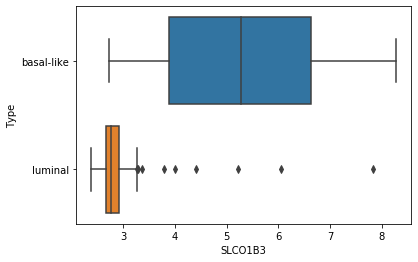

In [91]:
# Compare the miRNAs SLCO1B3 between two subtypes of bladder cancer
sns.boxplot(x="SLCO1B3",y="Type",data=bladder_cancer_gene_subset)

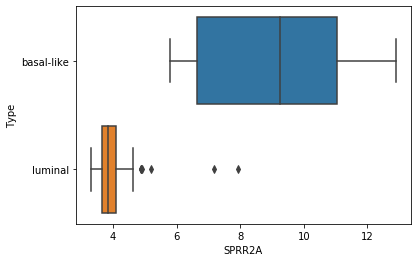

In [92]:
# Compare the miRNAs SPRR2A between two subtypes of bladder cancer
sns.boxplot(x="SPRR2A",y="Type",data=bladder_cancer_gene_subset)

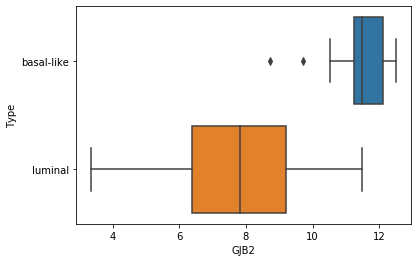

In [93]:
# Compare the miRNAs GJB2 between two subtypes of bladder cancer
sns.boxplot(x="GJB2",y="Type",data=bladder_cancer_gene_subset)

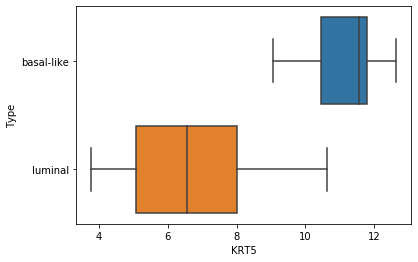

In [94]:
# Compare the miRNAs KRT5 between two subtypes of bladder cancer
sns.boxplot(x="KRT5",y="Type",data=bladder_cancer_gene_subset)

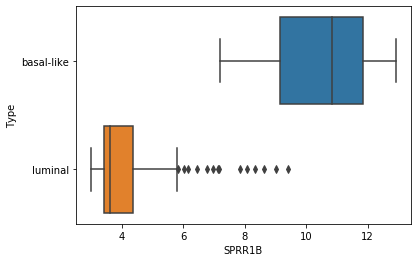

In [95]:
# Compare the miRNAs SPRR1B between two subtypes of bladder cancer
sns.boxplot(x="SPRR1B",y="Type",data=bladder_cancer_gene_subset)

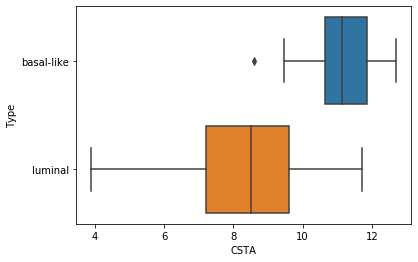

In [96]:
# Compare the miRNAs CSTA between two subtypes of bladder cancer
sns.boxplot(x="CSTA",y="Type",data=bladder_cancer_gene_subset)

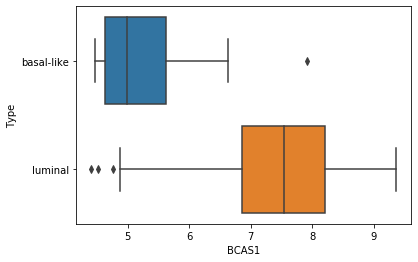

In [97]:
# Compare the miRNAs BCAS1 between two subtypes of bladder cancer
sns.boxplot(x="BCAS1",y="Type",data=bladder_cancer_gene_subset)

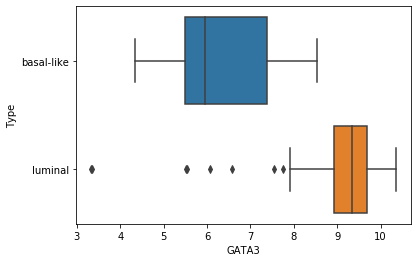

In [98]:
# Compare the miRNAs GATA3 between two subtypes of bladder cancer
sns.boxplot(x="GATA3",y="Type",data=bladder_cancer_gene_subset)

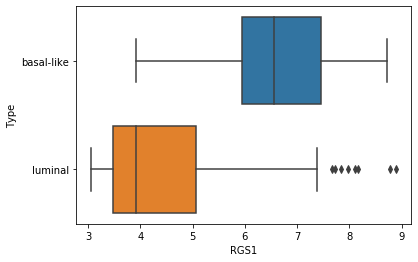

In [99]:
# Compare the miRNAs RGS1 between two subtypes of bladder cancer
sns.boxplot(x="RGS1",y="Type",data=bladder_cancer_gene_subset)

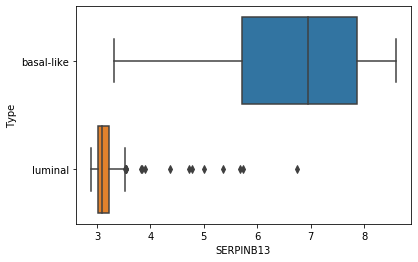

In [100]:
# Compare the miRNAs SERPINB13 between two subtypes of bladder cancer
sns.boxplot(x="SERPINB13",y="Type",data=bladder_cancer_gene_subset)

In [101]:
# compute means in 320 miRNAs among two subtypes group
bladder_cancer_gene_subset.groupby("Type").mean()

,SLCO1B3,SPRR2A,GJB2,KRT5,SPRR1B,CSTA,BCAS1,GATA3,RGS1,SERPINB13,Type_code
Type,,,,,,,,,,,
basal-like,5.329309,8.999618,11.433906,11.16372,10.443252,11.111571,5.245132,6.235044,6.615712,6.714353,0
luminal,2.893238,3.969962,7.796043,6.67197,4.175241,8.375773,7.387626,9.137075,4.491640,3.276353,1


miRNAs BCAS1 and GATA3 are underexpressed in luminal subtype of bladder cancer, while the other miRNAs are overexpressed in basal-like subtype of bladder cancer

### Reference 

Centers for Disease Control and Prevention. (n.d.). Retrieved April 30, 2020, from https://www.cdc.gov/


Deng, X., & Nakamura, Y. (2017). Cancer Precision Medicine: From Cancer Screening to Drug Selection and Personalized Immunotherapy. Trends in Pharmacological Sciences, 38(1), 15–24. https://doi.org/10.1016/j.tips.2016.10.013


Pirooznia, M., Yang, J. Y., Qu, M. Q., & Deng, Y. (2008). A comparative study of different machine learning methods on microarray gene expression data. BMC Genomics, 9(SUPPL. 1), S13. https://doi.org/10.1186/1471-2164-9-S1-S13
